### Divvy_Exercise_Full_Year_Analysis

This analysis is based on the Divvy case study "'Sophisticated, Clear, and Polished’: Divvy and Data Visualization" written by Kevin Hartman (found here: https://artscience.blog/home/divvy-dataviz-case-study). The purpose of this script is to consolidate downloaded Divvy data into a single dataframe and then conduct simple analysis to help answer the key question: “In what ways do members and casual riders use Divvy bikes differently?”

# Install required packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
jan_df= pd.read_csv('TripData_2022/2022_01-divvy-tripdata.csv' )
feb_df= pd.read_csv('TripData_2022/2022_02-divvy-tripdata.csv' )
mar_df= pd.read_csv('TripData_2022/2022_03-divvy-tripdata.csv' )
apr_df= pd.read_csv('TripData_2022/2022_04-divvy-tripdata.csv' )
may_df= pd.read_csv('TripData_2022/2022_05-divvy-tripdata.csv' )
jun_df= pd.read_csv('TripData_2022/2022_06-divvy-tripdata.csv' )
jul_df= pd.read_csv('TripData_2022/2022_07-divvy-tripdata.csv' )
aug_df= pd.read_csv('TripData_2022/2022_08-divvy-tripdata.csv' )
sep_df= pd.read_csv('TripData_2022/2022_09-divvy-publictripdata.csv' )
oct_df= pd.read_csv('TripData_2022/2022_10-divvy-tripdata.csv' )
nov_df= pd.read_csv('TripData_2022/2022_11-divvy-tripdata.csv' )
dec_df= pd.read_csv('TripData_2022/2022_12-divvy-tripdata.csv' )

In [3]:
merged_df = pd.concat([jan_df, feb_df, mar_df,apr_df,may_df,jun_df,jul_df,aug_df,sep_df,oct_df,nov_df, dec_df ], axis=0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [4]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


# Data Cleaning checklist
* Fixing datatype constraints
* Fixing data range constraints
* Removing Duplicates
* Categorise potential categorical data
* Fix any inconsistent formatting
* Cross field validation
* length violation for ay datatype
* Fix missing data


## Fixing datatype constraints

### Convert dates to date time

In [5]:
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])

### Convert Object to categorical

In [6]:
merged_df['rideable_type'] = pd.Categorical(merged_df['rideable_type'])
merged_df['member_casual'] = pd.Categorical(merged_df['member_casual'])

#### Validate that there are not any extra categories in the categorical columns 

In [7]:
merged_df['rideable_type']

0         electric_bike
1         electric_bike
2          classic_bike
3          classic_bike
4          classic_bike
              ...      
181801     classic_bike
181802    electric_bike
181803     classic_bike
181804     classic_bike
181805     classic_bike
Name: rideable_type, Length: 5667717, dtype: category
Categories (3, object): [classic_bike, docked_bike, electric_bike]

In [8]:
merged_df['member_casual']

0         casual
1         casual
2         member
3         casual
4         member
           ...  
181801    member
181802    member
181803    member
181804    member
181805    casual
Name: member_casual, Length: 5667717, dtype: category
Categories (2, object): [casual, member]

### Remove duplicates

In [9]:
merged_df.drop_duplicates(subset=['ride_id'], keep='first')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


#### There appears to be no duplicates based on ride_id

### Introducing a column called duration, Cross field validation must be ensured

In [10]:
try:
    # Calculate the difference between end_time and start_time and store it in a new column 'duration'
    merged_df['duration'] = merged_df['ended_at'] - merged_df['started_at']
except ValueError as e:
    print(f'An error occurred: {e}')
    print('Please check the format of the start_time and end_time columns')
except Exception as e:
    print(f'An unexpected error occurred: {e}')
    print('Please contact the administrator')


In [11]:
merged_df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,00:03:44
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,00:12:59
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,00:04:33
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,00:03:56
181805,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.948150,-87.663940,41.943403,-87.679618,casual,00:08:03


### Fix any inconsistent formatting


In [12]:
merged_df.columns
merged_df['start_lat']= merged_df['start_lat'].round(2)
merged_df['start_lng']= merged_df['start_lng'].round(2)
merged_df['end_lat']= merged_df['end_lat'].round(2)
merged_df['end_lng']= merged_df['end_lng'].round(2)

### Handling missing data

In [13]:
merged_df[merged_df['start_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.93,-87.76,casual,00:03:59
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.95,-87.67,member,00:04:02
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.95,-87.67,member,00:18:10
1079,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.92,-87.66,member,00:12:39
1080,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.92,-87.66,member,00:09:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181411,A53A821B6A869C19,electric_bike,2022-12-14 19:45:37,2022-12-14 19:56:25,NaN,NaN,Public Rack - Woodlawn Ave & 63rd St N,951,41.80,-87.60,41.78,-87.60,casual,00:10:48
181412,96AA5A684782CDB9,electric_bike,2022-12-08 14:18:35,2022-12-08 14:28:19,NaN,NaN,Seeley Ave & Roscoe St,13144,41.94,-87.66,41.94,-87.68,casual,00:09:44
181413,51BE43187C287458,electric_bike,2022-12-06 07:53:15,2022-12-06 08:01:47,NaN,NaN,Clinton St & Tilden St,13037,41.89,-87.66,41.88,-87.64,casual,00:08:32
181414,D34CC635D601EC54,electric_bike,2022-12-09 20:27:25,2022-12-09 20:31:31,NaN,NaN,Clinton St & Tilden St,13037,41.87,-87.64,41.88,-87.64,casual,00:04:06


In [14]:
merged_df[merged_df['end_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
510,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,NaN,41.90,-87.64,41.90,-87.64,member,00:01:26
512,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,NaN,41.89,-87.72,41.90,-87.71,member,00:05:20
19594,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,NaN,NaN,41.94,-87.68,41.94,-87.69,member,00:04:18
19595,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,NaN,NaN,41.90,-87.71,41.92,-87.67,casual,00:41:52
19596,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,NaN,NaN,41.98,-87.71,41.94,-87.71,casual,00:18:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175885,4C59327DA1B07FB2,electric_bike,2022-12-03 13:15:34,2022-12-03 13:21:34,Wood St & Milwaukee Ave,13221,NaN,NaN,41.91,-87.67,41.92,-87.69,casual,00:06:00
175886,0A8B4CFBD1E2F9B0,electric_bike,2022-12-21 17:18:23,2022-12-21 17:31:05,Michigan Ave & Washington St,13001,NaN,NaN,41.88,-87.62,41.86,-87.62,casual,00:12:42
175888,613BEA9FE6EA6343,electric_bike,2022-12-21 16:13:41,2022-12-21 16:18:59,Larrabee St & Armitage Ave,TA1309000006,NaN,NaN,41.92,-87.64,41.90,-87.64,casual,00:05:18
175889,3A8955AF9DD344A3,electric_bike,2022-12-21 11:38:27,2022-12-21 11:51:25,Dearborn St & Monroe St,TA1305000006,NaN,NaN,41.88,-87.63,41.86,-87.64,member,00:12:58


In [15]:
# Join coordinates 
merged_df['start_loc']= merged_df['start_lat'].astype(str) + "_" + merged_df['start_lng'].astype(str)
merged_df['end_loc']= merged_df['end_lat'].astype(str) + "_" + merged_df['end_lng'].astype(str)    

In [16]:
# Create a dictionary to map 'start_loc' values to non-null 'start_station_name' values and repeat for the id nums
start_loc_map = merged_df.dropna(subset=['start_station_name']).set_index('start_loc')['start_station_name'].to_dict()
start_loc_id_map = merged_df.dropna(subset=['start_station_id']).set_index('start_loc')['start_station_id'].to_dict()

# Use the map to impute the null values in the 'start_station_name' column
merged_df.loc[merged_df['start_station_name'].isnull(), 'start_station_name'] = merged_df.loc[merged_df['start_station_name'].isnull(), 'start_loc'].map(start_loc_map)
merged_df.loc[merged_df['start_station_id'].isnull(), 'start_station_id'] = merged_df.loc[merged_df['start_station_id'].isnull(), 'start_loc'].map(start_loc_id_map)

In [17]:
# Create a dictionary to map 'end_loc_map' values to non-null 'end_station_name' values and repeat for the id nums
end_loc_map = merged_df.dropna(subset=['end_station_name']).set_index('end_loc')['end_station_name'].to_dict()
end_loc_id_map = merged_df.dropna(subset=['end_station_id']).set_index('end_loc')['end_station_id'].to_dict()
# Use the map to impute the null values in the 'start_station_name' column
merged_df.loc[merged_df['end_station_name'].isnull(), 'end_station_name'] = merged_df.loc[merged_df['end_station_name'].isnull(), 'end_loc'].map(end_loc_id_map)
merged_df.loc[merged_df['end_station_id'].isnull(), 'end_station_id'] = merged_df.loc[merged_df['end_station_id'].isnull(), 'end_loc'].map(end_loc_id_map)

In [18]:
merged_df[merged_df['end_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_loc,end_loc
19689,5C82E01534ADE29B,electric_bike,2022-01-12 07:16:36,2022-01-12 07:31:54,Central Park & Augusta Blvd,370,NaN,NaN,41.90,-87.72,41.88,-87.68,casual,0 days 00:15:18,41.9_-87.72,41.88_-87.68
19690,A83AA3DBB8271D5B,electric_bike,2022-01-12 07:45:18,2022-01-12 07:48:11,Greenwood Ave & 97th St,20238,NaN,NaN,41.72,-87.60,41.72,-87.59,casual,0 days 00:02:53,41.72_-87.6,41.72_-87.59
19717,C1AB102E01C34020,classic_bike,2022-01-26 16:56:03,2022-01-27 17:55:56,Michigan Ave & Jackson Blvd,TA1309000002,NaN,NaN,41.88,-87.62,NaN,NaN,member,1 days 00:59:53,41.88_-87.62,nan_nan
19735,7CF2DA24D769D632,electric_bike,2022-01-03 16:21:22,2022-01-03 16:45:20,Avenue O & 118th St,20218,NaN,NaN,41.68,-87.54,41.69,-87.52,casual,0 days 00:23:58,41.68_-87.54,41.69_-87.52
19746,1A51C738B3CD1B3A,classic_bike,2022-01-10 18:50:12,2022-01-11 19:50:05,Western Ave & Leland Ave,TA1307000140,NaN,NaN,41.97,-87.69,NaN,NaN,casual,1 days 00:59:53,41.97_-87.69,nan_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175618,866EF596D264C2B4,classic_bike,2022-12-08 19:42:40,2022-12-09 20:42:32,Jeffery Blvd & 71st St,KA1503000018,NaN,NaN,41.77,-87.58,NaN,NaN,casual,1 days 00:59:52,41.77_-87.58,nan_nan
175693,24B4E1CF232C216B,classic_bike,2022-12-02 14:49:05,2022-12-03 15:48:57,Morgan St & 18th St,13163,NaN,NaN,41.86,-87.65,NaN,NaN,casual,1 days 00:59:52,41.86_-87.65,nan_nan
175794,001C856FBF98ECA6,electric_bike,2022-12-10 18:13:26,2022-12-10 18:26:16,Michigan Ave & Washington St,13001,NaN,NaN,41.88,-87.62,41.88,-87.68,member,0 days 00:12:50,41.88_-87.62,41.88_-87.68
175870,3459E3C370865C73,electric_bike,2022-12-04 01:28:30,2022-12-04 02:41:07,Lakefront Trail & Bryn Mawr Ave,15576,NaN,NaN,41.98,-87.65,42.05,-87.75,casual,0 days 01:12:37,41.98_-87.65,42.05_-87.75


In [19]:
merged_df[merged_df['start_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_loc,end_loc
16644,75940FFC2BB06465,electric_bike,2022-01-02 13:18:03,2022-01-02 13:40:19,NaN,NaN,Central Ave & Parker Ave,355,41.97,-87.76,41.93,-87.77,casual,00:22:16,41.97_-87.76,41.93_-87.77
19924,751A27255D582C86,electric_bike,2022-01-03 14:09:10,2022-01-03 14:24:15,NaN,NaN,RP-002,RP-002,42.01,-87.71,42.00,-87.68,casual,00:15:05,42.01_-87.71,42.0_-87.68
20177,2F1E1C95E14C04F0,electric_bike,2022-01-24 08:39:52,2022-01-24 08:59:31,NaN,NaN,650,650,41.77,-87.70,41.77,-87.64,casual,00:19:39,41.77_-87.7,41.77_-87.64
46643,F59BDD29D47ECE38,electric_bike,2022-01-22 12:33:25,2022-01-22 13:03:07,NaN,NaN,Sheridan Rd & Irving Park Rd,13063,41.97,-87.75,41.95,-87.65,member,00:29:42,41.97_-87.75,41.95_-87.65
57032,0DD28B99D8FEFD31,electric_bike,2022-01-24 13:12:45,2022-01-24 13:26:06,NaN,NaN,Benson Ave & Church St,596,42.03,-87.67,42.05,-87.68,member,00:13:21,42.03_-87.67,42.05_-87.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167575,90E19D6E9382215D,electric_bike,2022-12-02 03:32:03,2022-12-02 03:38:50,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,casual,00:06:47,41.83_-87.73,41.84_-87.72
167578,72D0CDCBECA11BA2,electric_bike,2022-12-17 03:11:10,2022-12-17 03:19:35,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,casual,00:08:25,41.83_-87.73,41.84_-87.72
167595,D157B436D1331FF0,electric_bike,2022-12-08 09:13:26,2022-12-08 09:24:42,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,member,00:11:16,41.83_-87.73,41.84_-87.72
167596,97887AB8EB3956C6,electric_bike,2022-12-06 09:14:14,2022-12-06 09:24:42,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,member,00:10:28,41.83_-87.73,41.84_-87.72


In [20]:
merged_df[merged_df['end_station_id'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_loc,end_loc
19689,5C82E01534ADE29B,electric_bike,2022-01-12 07:16:36,2022-01-12 07:31:54,Central Park & Augusta Blvd,370,NaN,NaN,41.90,-87.72,41.88,-87.68,casual,0 days 00:15:18,41.9_-87.72,41.88_-87.68
19690,A83AA3DBB8271D5B,electric_bike,2022-01-12 07:45:18,2022-01-12 07:48:11,Greenwood Ave & 97th St,20238,NaN,NaN,41.72,-87.60,41.72,-87.59,casual,0 days 00:02:53,41.72_-87.6,41.72_-87.59
19717,C1AB102E01C34020,classic_bike,2022-01-26 16:56:03,2022-01-27 17:55:56,Michigan Ave & Jackson Blvd,TA1309000002,NaN,NaN,41.88,-87.62,NaN,NaN,member,1 days 00:59:53,41.88_-87.62,nan_nan
19735,7CF2DA24D769D632,electric_bike,2022-01-03 16:21:22,2022-01-03 16:45:20,Avenue O & 118th St,20218,NaN,NaN,41.68,-87.54,41.69,-87.52,casual,0 days 00:23:58,41.68_-87.54,41.69_-87.52
19746,1A51C738B3CD1B3A,classic_bike,2022-01-10 18:50:12,2022-01-11 19:50:05,Western Ave & Leland Ave,TA1307000140,NaN,NaN,41.97,-87.69,NaN,NaN,casual,1 days 00:59:53,41.97_-87.69,nan_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175618,866EF596D264C2B4,classic_bike,2022-12-08 19:42:40,2022-12-09 20:42:32,Jeffery Blvd & 71st St,KA1503000018,NaN,NaN,41.77,-87.58,NaN,NaN,casual,1 days 00:59:52,41.77_-87.58,nan_nan
175693,24B4E1CF232C216B,classic_bike,2022-12-02 14:49:05,2022-12-03 15:48:57,Morgan St & 18th St,13163,NaN,NaN,41.86,-87.65,NaN,NaN,casual,1 days 00:59:52,41.86_-87.65,nan_nan
175794,001C856FBF98ECA6,electric_bike,2022-12-10 18:13:26,2022-12-10 18:26:16,Michigan Ave & Washington St,13001,NaN,NaN,41.88,-87.62,41.88,-87.68,member,0 days 00:12:50,41.88_-87.62,41.88_-87.68
175870,3459E3C370865C73,electric_bike,2022-12-04 01:28:30,2022-12-04 02:41:07,Lakefront Trail & Bryn Mawr Ave,15576,NaN,NaN,41.98,-87.65,42.05,-87.75,casual,0 days 01:12:37,41.98_-87.65,42.05_-87.75


In [21]:
merged_df[merged_df['start_station_id'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_loc,end_loc
16644,75940FFC2BB06465,electric_bike,2022-01-02 13:18:03,2022-01-02 13:40:19,NaN,NaN,Central Ave & Parker Ave,355,41.97,-87.76,41.93,-87.77,casual,00:22:16,41.97_-87.76,41.93_-87.77
19924,751A27255D582C86,electric_bike,2022-01-03 14:09:10,2022-01-03 14:24:15,NaN,NaN,RP-002,RP-002,42.01,-87.71,42.00,-87.68,casual,00:15:05,42.01_-87.71,42.0_-87.68
20177,2F1E1C95E14C04F0,electric_bike,2022-01-24 08:39:52,2022-01-24 08:59:31,NaN,NaN,650,650,41.77,-87.70,41.77,-87.64,casual,00:19:39,41.77_-87.7,41.77_-87.64
46643,F59BDD29D47ECE38,electric_bike,2022-01-22 12:33:25,2022-01-22 13:03:07,NaN,NaN,Sheridan Rd & Irving Park Rd,13063,41.97,-87.75,41.95,-87.65,member,00:29:42,41.97_-87.75,41.95_-87.65
57032,0DD28B99D8FEFD31,electric_bike,2022-01-24 13:12:45,2022-01-24 13:26:06,NaN,NaN,Benson Ave & Church St,596,42.03,-87.67,42.05,-87.68,member,00:13:21,42.03_-87.67,42.05_-87.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167575,90E19D6E9382215D,electric_bike,2022-12-02 03:32:03,2022-12-02 03:38:50,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,casual,00:06:47,41.83_-87.73,41.84_-87.72
167578,72D0CDCBECA11BA2,electric_bike,2022-12-17 03:11:10,2022-12-17 03:19:35,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,casual,00:08:25,41.83_-87.73,41.84_-87.72
167595,D157B436D1331FF0,electric_bike,2022-12-08 09:13:26,2022-12-08 09:24:42,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,member,00:11:16,41.83_-87.73,41.84_-87.72
167596,97887AB8EB3956C6,electric_bike,2022-12-06 09:14:14,2022-12-06 09:24:42,NaN,NaN,Harding Ave & 26th St,332.0,41.83,-87.73,41.84,-87.72,member,00:10:28,41.83_-87.73,41.84_-87.72


In [22]:
merged_df=merged_df.dropna()

In [23]:
merged_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_loc,end_loc
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,00:02:57,42.01_-87.67,42.01_-87.67
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual,00:04:21,42.01_-87.67,42.01_-87.67
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.93,-87.65,41.93,-87.67,member,00:04:21,41.93_-87.65,41.93_-87.67
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98,-87.67,41.96,-87.67,casual,00:14:56,41.98_-87.67,41.96_-87.67
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.88,-87.62,41.88,-87.63,member,00:06:02,41.88_-87.62,41.88_-87.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.88,-87.65,41.88,-87.65,member,00:03:44,41.88_-87.65,41.88_-87.65
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.95,-87.71,41.94,-87.68,member,00:12:59,41.95_-87.71,41.94_-87.68
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.88,-87.64,41.88,-87.65,member,00:04:33,41.88_-87.64,41.88_-87.65
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.88,-87.65,41.88,-87.65,member,00:03:56,41.88_-87.65,41.88_-87.65


### Handling the missing data report
*  The start_station_name and start_station_id columns, there was 833,064 null values, after processing it was reduced to 11,756
*  The start_station_name and start_station_id columns, there was 892,742 null values, after processing it was reduced to 40,544 
*  The dataframe had 5,667,717 rows after using dropna it was reduced to 5,617,918

In [24]:
# Adding a column that has the day of the week the bike was rented
merged_df['day_of_week'] = merged_df['started_at'].dt.weekday_name

In [25]:
# Adding a column that has the duration in seconds
merged_df['duration_sec']= pd.to_timedelta(merged_df['duration'])
merged_df['duration_sec']=merged_df['duration_sec'].dt.total_seconds()

In [26]:
# Removing rows with durations that are less than 0
merged_df = merged_df[merged_df['duration_sec'] >= 0]

# Descriptive analysis

###  Descriptive analysis on ride_length (all figures in seconds)

In [27]:
merged_df['duration_sec'].describe() 

count    5.617820e+06
mean     9.787943e+02
std      2.608591e+03
min      0.000000e+00
25%      3.490000e+02
50%      6.150000e+02
75%      1.103000e+03
max      2.061244e+06
Name: duration_sec, dtype: float64

In [28]:
merged_df[merged_df['member_casual']=='casual']['duration_sec'].describe()

count    2.293210e+06
mean     1.319926e+03
std      3.805379e+03
min      0.000000e+00
25%      4.400000e+02
50%      7.780000e+02
75%      1.438000e+03
max      2.061244e+06
Name: duration_sec, dtype: float64

In [29]:
merged_df[merged_df['member_casual']=='member']['duration_sec'].describe()

count    3.324610e+06
mean     7.434926e+02
std      1.172326e+03
min      0.000000e+00
25%      3.060000e+02
50%      5.290000e+02
75%      9.140000e+02
max      8.999600e+04
Name: duration_sec, dtype: float64

### Average Ride Duration by Day of Week and User Type

In [30]:
aggregated_weekday_df = merged_df.groupby([ 'day_of_week', 'member_casual']).agg({'duration_sec': 'mean'})


In [31]:
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
aggregated_weekday_df = aggregated_weekday_df.pivot_table(values='duration_sec', index='day_of_week', columns='member_casual')
aggregated_weekday_df = aggregated_weekday_df.reindex(weekday_order)
aggregated_weekday_df

member_casual,casual,member
day_of_week,,
Sunday,1506.402283,820.292144
Monday,1358.751521,718.860018
Tuesday,1178.613942,707.759346
Wednesday,1140.654748,709.060561
Thursday,1180.500965,719.505587
Friday,1232.177530,732.075049
Saturday,1479.267124,826.205182


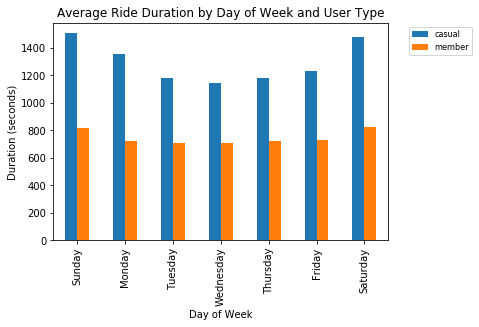

In [32]:
# Create the bar chart
fig, ax = plt.subplots()
aggregated_weekday_df.plot.bar(ax=ax)

# Add labels and title
plt.xlabel("Day of Week")
plt.ylabel("Duration (seconds)")
plt.title("Average Ride Duration by Day of Week and User Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 8})
# Show the chart
plt.show()

### Total number of ridees by Day of Week and User Type

In [33]:
count_df=merged_df.groupby([ 'day_of_week', 'member_casual']).agg({'member_casual':'count'})

In [34]:
count_df = count_df.rename(columns={'member_casual': 'count'})
count_df = count_df.pivot_table(values='count', index='day_of_week', columns='member_casual')
count_df = count_df.reindex(weekday_order)
count_df

member_casual,casual,member
day_of_week,,
Sunday,384361,384478
Monday,273955,470582
Tuesday,260277,515662
Wednesday,270970,520783
Thursday,305313,529005
Friday,330214,463925
Saturday,468120,440175


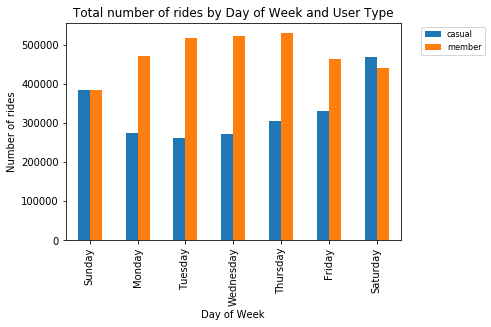

In [50]:
# Create the bar chart

fig, ax = plt.subplots()
count_df.plot.bar(ax=ax)

# Add labels and title
plt.xlabel("Day of Week")
plt.ylabel("Number of rides")
plt.title("Total number of rides by Day of Week and User Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 8})

# Show the chart
plt.show()

In [36]:
merged_df['hour_of_day'] = merged_df['started_at'].dt.hour


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
aggregated_hour_df = merged_df.groupby([ 'hour_of_day', 'member_casual']).agg({'duration_sec': 'count'})
aggregated_hour_df = aggregated_hour_df.pivot_table(values='duration_sec', index='hour_of_day', columns='member_casual')
aggregated_hour_df = aggregated_hour_df.reindex(hour_order)
aggregated_hour_df

member_casual,casual,member
hour_of_day,,
0,45983,35742
1,29782,22013
2,18406,12785
3,10877,7988
4,7384,8841
5,12145,32103
6,28884,90547
7,50602,171602
8,69076,203632


In [42]:
aggregated_bike_type_df = merged_df.groupby([ 'rideable_type', 'member_casual']).agg({'ride_id': 'count'})
aggregated_bike_type_df = aggregated_bike_type_df.pivot_table(values='ride_id', index='rideable_type', columns='member_casual')
aggregated_bike_type_df

member_casual,casual,member
rideable_type,,
classic_bike,888888.0,1709054.0
docked_bike,174858.0,NaN
electric_bike,1229464.0,1615556.0


In [48]:
aggregated_bike_type_df['casual']= aggregated_bike_type_df['casual']/aggregated_bike_type_df['casual'].sum()
aggregated_bike_type_df['member']= aggregated_bike_type_df['member']/aggregated_bike_type_df['member'].sum()

aggregated_bike_type_df

member_casual,casual,member
rideable_type,,
classic_bike,0.387617,0.514061
docked_bike,0.076250,NaN
electric_bike,0.536132,0.485939


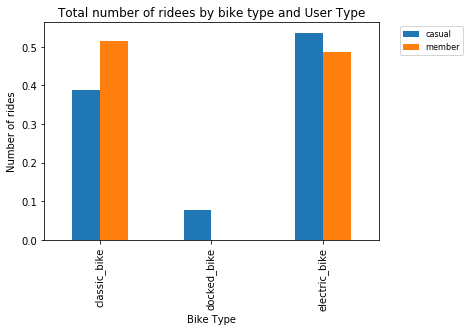

In [49]:
fig, ax = plt.subplots()
aggregated_bike_type_df.plot.bar(ax=ax)

# Add labels and title
plt.xlabel("Bike Type")
plt.ylabel("Proportion of rides")
plt.title("Proportion of rides  by bike type and User Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 8})

# Show the chart
plt.show()

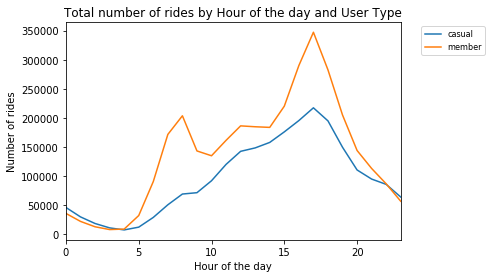

In [38]:
# Create the line chart

fig, ax = plt.subplots()
aggregated_hour_df.plot.line(ax=ax)

# Add labels and title
plt.xlabel("Hour of the day")
plt.ylabel("Number of rides")
plt.title("Total number of rides by Hour of the day and User Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 8})

# Show the chart
plt.show()

# Analytical Summary

### Based on the analysis of the dataset, the following findings were observed:

* Ride Duration: Casual members, on average, took longer rides per ride compared to annual members.

* Ride Frequency: During the weekdays, the number of rides taken by annual members was slightly higher compared to casual members. However, on Sundays, the number of rides taken by both groups was almost equal, while on Saturdays, casual members took more rides.

* Bike Type Preferences: Among annual members, the usage of classic bikes and electric bikes was approximately equal, with classic bikes being slightly more popular with 51% of rides while electric bikes got 49% of the share. The usage of docked bikes among annual members was negligible (0%). On the other hand, casual members showed a preference for electric bikes, with 54% of the rides, followed by classic bikes with 39% and docked bikes with 7%.

* Usage Patterns: The usage patterns of the bikes by annual and casual members during the day were found to be similar.

# Export the data for further visualizations 

In [39]:
# Drop columns that are considered redundant or no longer serves any purpose
merged_df=merged_df.drop(['start_station_id'],axis=1)
merged_df=merged_df.drop(['end_station_id'],axis=1)
merged_df=merged_df.drop(['duration'],axis=1)
merged_df=merged_df.drop(['hour_of_day'],axis=1)
merged_df=merged_df.drop(['day_of_week'],axis=1)
merged_df=merged_df.drop(['start_loc'],axis=1)
merged_df=merged_df.drop(['end_loc'],axis=1)

In [43]:
merged_df.to_csv('clean_rider_data.csv')